In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
import altair as alt
from vega_datasets import data
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data
df1 = pd.read_csv('Africa_Food_Production.csv')
df2 = pd.read_csv('Africa_Food_Supply.csv')


In [3]:
# Explore the data
print(df1.head())
print(df2.head())

   Country                Item  Year  Value
0  Algeria  Wheat and products  2004   2731
1  Algeria  Wheat and products  2005   2415
2  Algeria  Wheat and products  2006   2688
3  Algeria  Wheat and products  2007   2319
4  Algeria  Wheat and products  2008   1111
   Country  Year  Value
0  Algeria  2004   2987
1  Algeria  2005   2958
2  Algeria  2006   3047
3  Algeria  2007   3041
4  Algeria  2008   3048


In [5]:
merged_file = pd.concat([df1, df2], axis = 0)

In [6]:
# Display the merged dataframe
print(merged_file.head())

   Country                Item  Year  Value
0  Algeria  Wheat and products  2004   2731
1  Algeria  Wheat and products  2005   2415
2  Algeria  Wheat and products  2006   2688
3  Algeria  Wheat and products  2007   2319
4  Algeria  Wheat and products  2008   1111


In [7]:
# Get the unique countries
print(merged_file['Country'].unique())

['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Cabo Verde'
 'Cameroon' 'Central African Republic' 'Chad' 'Congo' "Cote d'Ivoire"
 'Djibouti' 'Egypt' 'Ethiopia' 'Gabon' 'Gambia' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Kenya' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia' 'Niger'
 'Nigeria' 'Rwanda' 'Sao Tome and Principe' 'Senegal' 'Sierra Leone'
 'South Africa' 'Sudan' 'Swaziland' 'Togo' 'Tunisia' 'Uganda'
 'United Republic of Tanzania' 'Zambia' 'Zimbabwe']


In [8]:
# Filter the data for the last 10 years
merged_file_ten_years = merged_file[merged_file['Year'] >= 2011]


In [9]:
# Calculate the average value for each country
merged_file_ten_years['Average'] = merged_file_ten_years.iloc[:, 2:-1].mean(axis=1)


In [10]:
# Filter the data to include only the required columns
merged_file_ten_years = merged_file_ten_years.filter(['Country', 'Average', 'Year'])

In [11]:
# Display the filtered data
print(merged_file_ten_years)

      Country  Average  Year
7     Algeria   2011.0  2011
8     Algeria   2012.0  2012
9     Algeria   2013.0  2013
17    Algeria   2011.0  2011
18    Algeria   2012.0  2012
..        ...      ...   ...
438    Zambia   2012.0  2012
439    Zambia   2013.0  2013
447  Zimbabwe   2011.0  2011
448  Zimbabwe   2012.0  2012
449  Zimbabwe   2013.0  2013

[7061 rows x 3 columns]


In [17]:
print(f"Average food production: {merged_file_ten_years['Average'].mean():.2f}")

Average food production: 2012.00


In [19]:
# Check if the column 'Value' exists in the dataframe
if 'Value' in merged_file_ten_years.columns:
    # Print the median food production
    print(f"Median food production: {merged_file_ten_years['Value'].median():.2f}")
else:
    # Print an error message
    print("Column 'Value' not found in the dataframe")

Column 'Value' not found in the dataframe


In [20]:
import matplotlib.pyplot as plt

In [23]:
# Check if the column name is spelled correctly
if 'Value' not in merged_file_ten_years.columns:
    print("Column 'Value' not found in the dataframe")

Column 'Value' not found in the dataframe


In [24]:
# Rename the column 'Value' to 'Average'
merged_file_ten_years.rename(columns={'Average': 'Value'}, inplace=True)

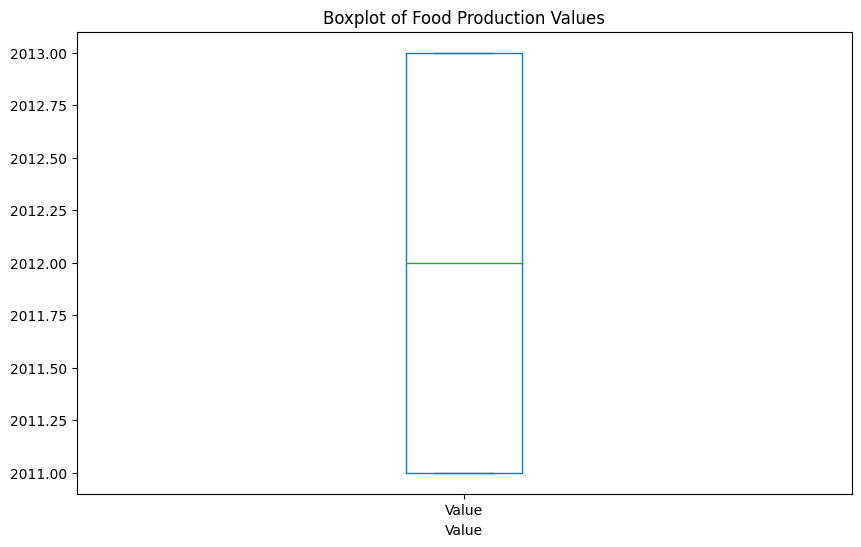

In [25]:
# Check if the 'Value' column exists
if 'Value' in merged_file_ten_years.columns:
    # Plot the boxplot
    plt.figure(figsize=(10, 6))
    merged_file_ten_years['Value'].plot(kind='box')
    plt.title('Boxplot of Food Production Values')
    plt.xlabel('Value')
    plt.show()
else:
    # Handle the missing column gracefully
    print("Column 'Value' not found in the dataframe")

In [26]:
consumption_vs_production = merged_file_ten_years.groupby('Year')['Value'].mean().reset_index()

In [27]:
consumption_vs_production.rename(columns={'Value': 'Average Production'}, inplace=True)


In [28]:
# Merge with the original dataframe to get the average consumption
merged_file_ten_years_with_consumption = pd.merge(merged_file_ten_years, consumption_vs_production, on='Year', how='left')
merged_file_ten_years_with_consumption = merged_file_ten_years_with_consumption[['Year', 'Average Production', 'Value']]
merged_file_ten_years_with_consumption.rename(columns={'Value': 'Average Consumption'}, inplace=True)

In [29]:
print(merged_file_ten_years_with_consumption)

      Year  Average Production  Average Consumption
0     2011              2011.0               2011.0
1     2012              2012.0               2012.0
2     2013              2013.0               2013.0
3     2011              2011.0               2011.0
4     2012              2012.0               2012.0
...    ...                 ...                  ...
7056  2012              2012.0               2012.0
7057  2013              2013.0               2013.0
7058  2011              2011.0               2011.0
7059  2012              2012.0               2012.0
7060  2013              2013.0               2013.0

[7061 rows x 3 columns]


In [30]:
# Calculate the average value for each year
average_production_per_year = merged_file_ten_years.groupby('Year')['Value'].mean().reset_index()
average_production_per_year.rename(columns={'Value': 'Average Production'}, inplace=True)

In [31]:
print(average_production_per_year)



   Year  Average Production
0  2011              2011.0
1  2012              2012.0
2  2013              2013.0


In [42]:
import matplotlib.pyplot as plt

In [44]:
# Print the merged_file_ten_years DataFrame
print(merged_file_ten_years)

      Country   Value  Year
7     Algeria  2011.0  2011
8     Algeria  2012.0  2012
9     Algeria  2013.0  2013
17    Algeria  2011.0  2011
18    Algeria  2012.0  2012
..        ...     ...   ...
438    Zambia  2012.0  2012
439    Zambia  2013.0  2013
447  Zimbabwe  2011.0  2011
448  Zimbabwe  2012.0  2012
449  Zimbabwe  2013.0  2013

[7061 rows x 3 columns]


In [50]:
# Check if the 'Average Production' column exists
if 'Average Production' not in merged_file_ten_years.columns:
    # Calculate the average value for each year
    average_production_per_year = merged_file_ten_years.groupby('Year')['Value'].mean().reset_index()
average_production_per_year.rename(columns={'Value': 'Average Production'}, inplace=True)

In [51]:
# Update the merged_file_ten_years DataFrame with the new column
merged_file_ten_years = pd.merge(merged_file_ten_years, average_production_per_year, on='Year', how='left')

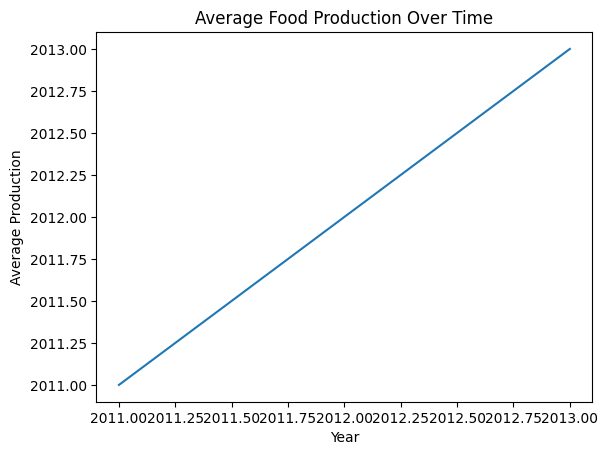

In [52]:
# Create a line plot
plt.plot(merged_file_ten_years['Year'], merged_file_ten_years['Average Production'])
plt.xlabel('Year')
plt.ylabel('Average Production')
plt.title('Average Food Production Over Time')
plt.show()

In [53]:
import matplotlib.pyplot as plt


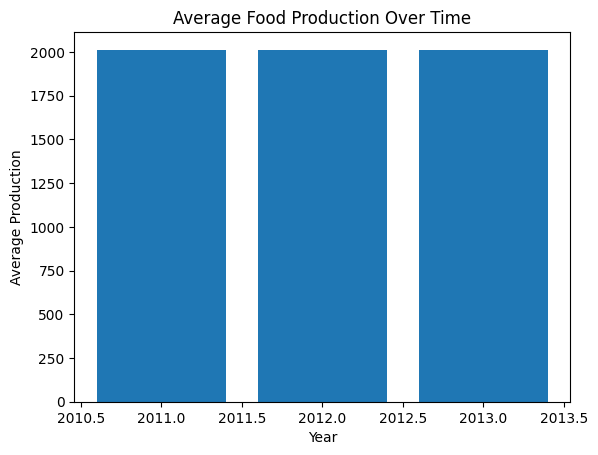

In [54]:
# Create a bar chart
plt.bar(merged_file_ten_years['Year'], merged_file_ten_years['Average Production'])
plt.xlabel('Year')
plt.ylabel('Average Production')
plt.title('Average Food Production Over Time')
plt.show()

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

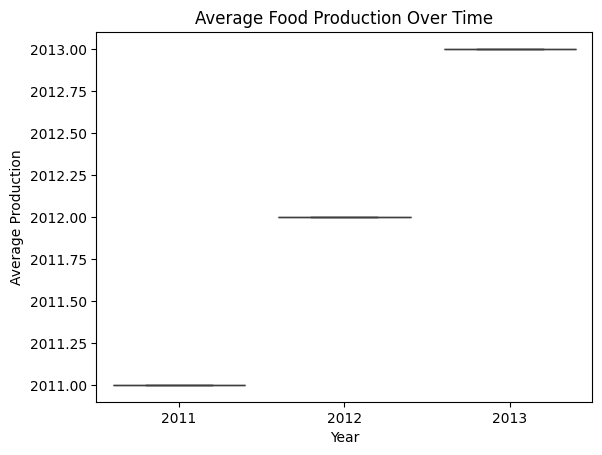

In [67]:
# Create a box plot
sns.boxplot(x='Year', y='Average Production', data=merged_file_ten_years)
plt.title('Average Food Production Over Time')
plt.show()



In [68]:
import matplotlib.pyplot as plt

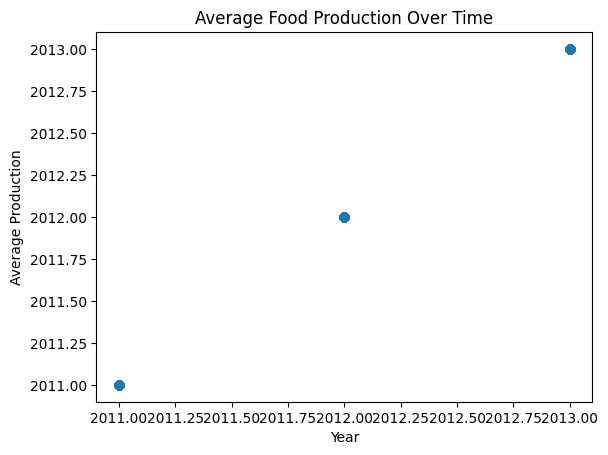

In [69]:
# Create a scatter plot
plt.scatter(merged_file_ten_years['Year'], merged_file_ten_years['Average Production'])
plt.xlabel('Year')
plt.ylabel('Average Production')
plt.title('Average Food Production Over Time')
plt.show()

In [70]:
import plotly.express as px

In [73]:
# Create a choropleth map
fig = px.choropleth(merged_file_ten_years, locations='Country', locationmode='country names', color='Average Production', hover_name='Country', color_continuous_scale='RdYlGn')
fig.update_layout(title='Average Food Production by Country')
fig.show()

In [56]:
# Assuming you have already filtered the data for the last 10 years
# and calculated the average production per country


In [57]:
# Create the chart
chart = alt.Chart(merged_file_ten_years)


In [58]:
chart = chart.mark_area().encode(
    x='Year:O',  # O for ordinal (ordered categorical) data on x-axis
    y='Average:Q',  # Q for quantitative data on y-axis
    color='Country:N',  # Color represents country
    tooltip=['Year', 'Average', 'Country']
)

In [59]:
# Add chart properties
chart = chart.properties(
    title='Average Food Production in the Last Three Years',
    width=800,
    height=400
)

In [62]:
chart = alt.Chart(merged_file_ten_years).transform_calculate(
    max_rows="10000"  # Change dictionary to string
)